# Weekly Case Trend - Hillsborough FL

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Read the virus data

The virus data comes from a NY Times github repo. it's located at:

https://github.com/nytimes/covid-19-data

with artical at:

https://www.nytimes.com/article/coronavirus-county-data-us.html


In [2]:
# paths

rootpath = Path('..')

datapath = rootpath / 'data'

### Add line to bottom of this section for new data
path_covid_data_us_counties_1 = datapath / 'covid-19-data-20200706' / 'us-counties.csv'
path_covid_data_us_counties_2 = datapath / 'covid-19-data-20200720' / 'us-counties.csv'
path_covid_data_us_counties_3 = datapath / 'covid-19-data-20200813' / 'us-counties.csv'
path_covid_data_us_counties_4 = datapath / 'covid-19-data-20200820' / 'us-counties.csv'
path_covid_data_us_counties_5 = datapath / 'covid-19-data-20200827' / 'us-counties.csv'
path_covid_data_us_counties_6 = datapath / 'covid-19-data-20200903' / 'us-counties.csv'
path_covid_data_us_counties_7 = datapath / 'covid-19-data-20200916' / 'us-counties.csv'
path_covid_data_us_counties_8 = datapath / 'covid-19-data-20201001' / 'us-counties.csv'

path_covid_data_us_counties_g = rootpath / '..' / 'covid-19-data' / 'us-counties.csv'

### Update this line
county_data_path = path_covid_data_us_counties_g

df_covid_data_us_counties = pd.read_csv(county_data_path)

### Virginia Counties:

- Hillsborough County, FL (12057), pop = 1,436,890
- Pinellas (12103), pop = 975,280
- Pasco (12101), pop = 539,630

total pop = 2,951,800 (2020)

population from https://worldpopulationreview.com/us-counties/states/fl

In [3]:
# make a list of all the counties i'm interested in
list_fips_fl_counties = [12057, 12103, 12101]
pop2020 = 2951800

# list_fips_va_counties = [51047, 51061, 51177, 51179, 51153, 51059, 51107,51013]
# list_fips_va_cities = [51630, 51683, 51600, 51610, 51510]
# list_fips_dc = [11000, 11001]
# list_fips_md = [24017, 24033, 24031, 24027, 24003, 24021]

# list_fips_va = list_fips_va_counties + list_fips_va_cities

# list_fips_metrodc = list_fips_va + list_fips_dc + list_fips_md 

In [4]:
# get the data fpr particular counties in list from above
df_covid_data_hills_fl = df_covid_data_us_counties[df_covid_data_us_counties.fips.isin(list_fips_fl_counties)]

# aggregate the sums of cases and deaths by date
df_covid_data_hills_bydate_diff = df_covid_data_hills_fl.groupby(['date'])[['cases', 'deaths']].agg('sum').diff().reset_index()

# derive a column for the sliding average
df_covid_data_hills_bydate_diff['cases_7day_ave'] = df_covid_data_hills_bydate_diff.cases.rolling(7).mean().shift(-3)

# derive per capita data
df_covid_data_hills_bydate_diff['cases_pc'] = df_covid_data_hills_bydate_diff['cases'] / pop2020 * 100000
df_covid_data_hills_bydate_diff['cases_7d_pc'] = df_covid_data_hills_bydate_diff['cases_7day_ave'] / pop2020 * 100000

# display the most recent 20 days
df_covid_data_hills_bydate_diff.tail(20)

,date,cases,deaths,cases_7day_ave,cases_pc,cases_7d_pc
208,2020-09-25,296.0,10.0,268.142857,10.027780,9.084046
209,2020-09-26,396.0,5.0,279.428571,13.415543,9.466379
210,2020-09-27,186.0,0.0,269.142857,6.301240,9.117923
211,2020-09-28,195.0,0.0,265.857143,6.606139,9.006611
212,2020-09-29,297.0,16.0,267.285714,10.061657,9.055008
213,2020-09-30,225.0,12.0,257.428571,7.622468,8.721071
214,2020-10-01,266.0,9.0,263.142857,9.011451,8.914657
215,2020-10-02,306.0,11.0,263.571429,10.366556,8.929176
216,2020-10-03,327.0,13.0,254.428571,11.077986,8.619438
217,2020-10-04,226.0,3.0,259.857143,7.656345,8.803345


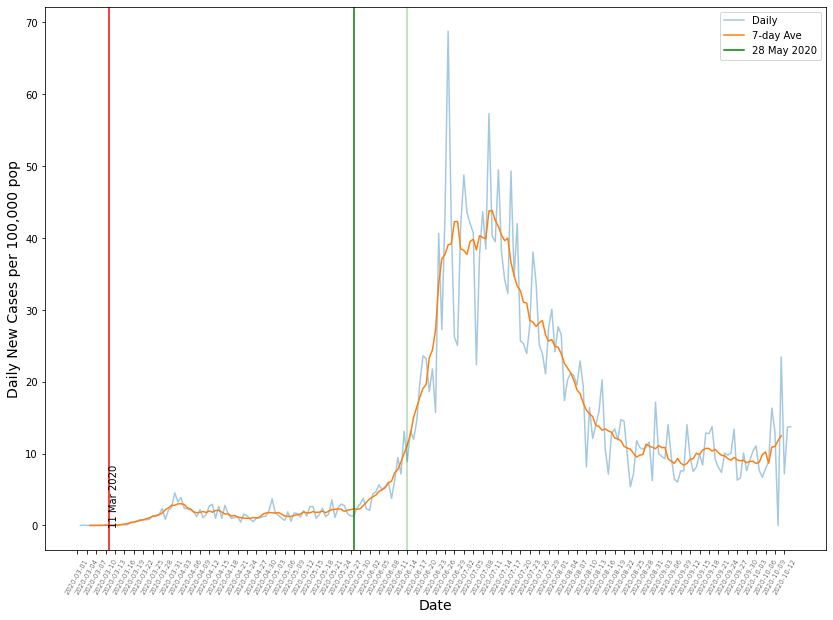

In [5]:
# bigger plot elements suitable for giving talks
#sns.set_context("talk")

# set figure size
fig = plt.figure(figsize=(14,10))

# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",
             y="cases_pc",
             label="Daily", 
             data=df_covid_data_hills_bydate_diff,
             ci=None, 
             alpha=.4)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
plot_ = sns.lineplot(x="date",
                     y="cases_7d_pc",
                     label="7-day Ave",
                     data=df_covid_data_hills_bydate_diff)#,
                     #ci=None)
fig.canvas.draw()

plt.axvline('2020-03-11', color='r')
plt.text(10.1,0,'11 Mar 2020',rotation=90)

plt.axvline('2020-05-28', color='green', label="28 May 2020")

plt.axvline('2020-06-14', color='green', alpha=.31)

plt.legend()

# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Daily New Cases per 100,000 pop", size=14)

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 3), new_ticks[::3], rotation=60, fontweight='light', fontsize='x-small')

# plt.xticks(
#     rotation=90,
#     fontweight='light',
#     fontsize='x-small'
# )

# save image as PNG file
plt.savefig("Time_Series_Plot_with_7day_average_Seaborn.png",
                    format='png',
                    dpi=150)